In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

In [13]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
file_data = pd.read_excel('/content/gdrive/My Drive/data.xlsx')
file_data.tail()

,bed_code,branch_code,room_size,sex,gu,dong,deposite,month_bill,subway_dist,bus_dist,uni_dist,hospital,pharmacy,gym,library,police,park,rate
907,164M1,164,1,혼성,성동구,성수동1가,5000000,570000,0.272437,168.197664,1.758763,1.250308,0.51988,1.062654,0.158419,0.621789,0.324078,1.0
908,165A1,165,1,여성,중구,장충동2가,1100000,470000,0.433619,173.102839,0.274396,1.913166,1.82018,1.865206,1.643244,1.545820,0.849624,0.0
909,165B1,165,1,여성,중구,장충동2가,1100000,470000,0.433619,173.102839,0.274396,1.913166,1.82018,1.865206,1.643244,1.545820,0.849624,0.0
910,165C1,165,2,여성,중구,장충동2가,860000,350000,0.433619,173.102839,0.274396,1.913166,1.82018,1.865206,1.643244,1.545820,0.849624,0.0
911,165C2,165,2,여성,중구,장충동2가,860000,350000,0.433619,173.102839,0.274396,1.913166,1.82018,1.865206,1.643244,1.545820,0.849624,0.0


In [15]:
def subway(x):
  if x<0.2: return 5
  elif 0.2<=x<0.4: return 4
  elif 0.4<=x<0.7: return 3
  elif 0.7<=x<0.9: return 2
  else: return 1

def bus(x):
  if x<30: return 5
  elif 30<=x<100: return 4
  elif 100<=x<170: return 3
  elif 170<=x<250: return 2
  else: return 1

def dis(x):
  if x<1: return 5
  elif 1<=x<1.7: return 4
  elif 1.7<=x<2.3: return 3
  elif 2.3<=x<3: return 2
  else: return 1






file_data['sex'] = file_data['sex'].str.replace('여성', '1')
file_data['sex'] = file_data['sex'].str.replace('혼성', '2')
file_data['sex'] = file_data['sex'].str.replace('남성', '3')
file_data['sex'] = file_data['sex'].astype(float)
#file_data['bus_dist'] = file_data['bus_dist']/100

file_data['subway_dist'] = file_data['subway_dist'].apply(subway)
file_data['bus_dist'] = file_data['bus_dist'].apply(bus)
file_data['uni_dist'] = file_data['uni_dist'].apply(dis)
file_data['hospital'] = file_data['hospital'].apply(dis)
file_data['pharmacy'] = file_data['pharmacy'].apply(dis)
file_data['gym'] = file_data['gym'].apply(dis)
file_data['library'] = file_data['library'].apply(dis)
file_data['police'] = file_data['police'].apply(dis)
file_data['park'] = file_data['park'].apply(dis)
file_data.tail()




,bed_code,branch_code,room_size,sex,gu,dong,deposite,month_bill,subway_dist,bus_dist,uni_dist,hospital,pharmacy,gym,library,police,park,rate
907,164M1,164,1,2.0,성동구,성수동1가,5000000,570000,4,3,3,4,5,4,5,5,5,1.0
908,165A1,165,1,1.0,중구,장충동2가,1100000,470000,3,2,5,3,3,3,4,4,5,0.0
909,165B1,165,1,1.0,중구,장충동2가,1100000,470000,3,2,5,3,3,3,4,4,5,0.0
910,165C1,165,2,1.0,중구,장충동2가,860000,350000,3,2,5,3,3,3,4,4,5,0.0
911,165C2,165,2,1.0,중구,장충동2가,860000,350000,3,2,5,3,3,3,4,4,5,0.0


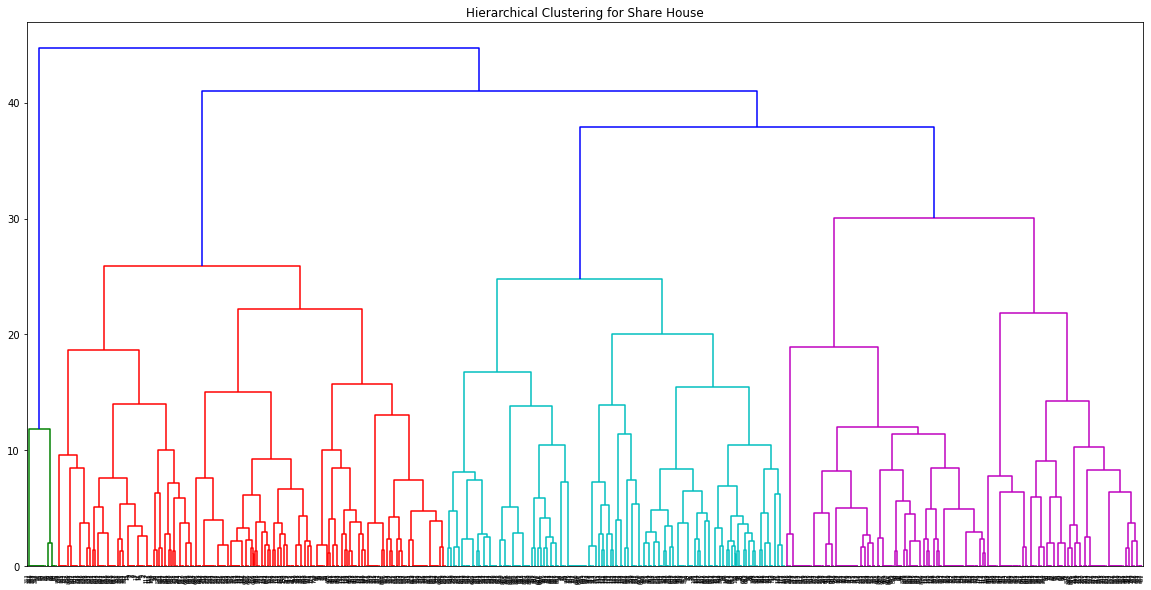

In [16]:
data = file_data.iloc[:, [2,3,8,9,10,11,12,13,14,15,16]].values
import scipy.cluster.hierarchy as shc



plt.figure(figsize=(20,10))
plt.title("Hierarchical Clustering for Share House") 
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [17]:
from sklearn.cluster import AgglomerativeClustering


cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
file_data['cluster_data'] = cluster.fit_predict(data)
file_data.tail(30)

,bed_code,branch_code,room_size,sex,gu,dong,deposite,month_bill,subway_dist,bus_dist,uni_dist,hospital,pharmacy,gym,library,police,park,rate,cluster_data
882,159C1,159,2,1.0,중구,장충동2가,860000,350000,4,3,5,3,3,3,4,4,5,0.00,1
883,159C2,159,2,1.0,중구,장충동2가,860000,350000,4,3,5,3,3,3,4,4,5,0.00,1
884,160A1,160,1,1.0,중구,장충동2가,1100000,470000,4,3,5,3,3,3,4,4,5,0.00,1
885,160B1,160,1,1.0,중구,장충동2가,1100000,470000,4,3,5,3,3,3,4,4,5,0.00,1
886,160C1,160,2,1.0,중구,장충동2가,860000,350000,4,3,5,3,3,3,4,4,5,0.00,1
887,160C2,160,2,1.0,중구,장충동2가,860000,350000,4,3,5,3,3,3,4,4,5,0.00,1
888,161A1,161,1,3.0,관악구,봉천동,1060000,450000,3,1,3,5,5,5,5,5,5,0.00,2
889,161B1,161,1,3.0,관악구,봉천동,1060000,450000,3,1,3,5,5,5,5,5,5,0.00,2
890,161C1,161,2,3.0,관악구,봉천동,1060000,450000,3,1,3,5,5,5,5,5,5,0.75,2
891,161D1,161,2,3.0,관악구,봉천동,1060000,450000,3,1,3,5,5,5,5,5,5,0.00,2


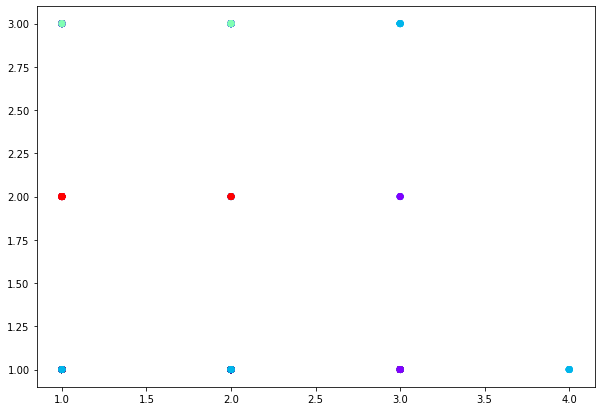

In [22]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')